In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import numpy as np
import os
os.listdir('../')

['.ipynb_checkpoints',
 'code',
 'dt.pkl',
 'funda_train.csv',
 'sub',
 'submission.csv',
 'train2.pkl']

In [2]:
path = '../'

In [2]:
train = pd.read_pickle(path + 'train2.pkl')
print(train.shape)
train.head(3)

(6556613, 21)


,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute,point_use,installment,business_type1,city1,city2,date_block_1,date_block_3
0,0,0,b,2016-06-01,13:13:00,0,NaN,기타 미용업,1857.142857,2016,6,1,13,13,0,0,미용업,NaN,NaN,1,1
1,0,1,h,2016-06-01,18:12:00,0,NaN,기타 미용업,857.142857,2016,6,1,18,12,0,0,미용업,NaN,NaN,1,1
2,0,2,c,2016-06-01,18:52:00,0,NaN,기타 미용업,2000.000000,2016,6,1,18,52,0,0,미용업,NaN,NaN,1,1


In [3]:
train.isnull().sum()

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
year                      0
month                     0
day                       0
hour                      0
minute                    0
point_use                 0
installment               0
business_type1            0
city1               2042766
city2               2042766
date_block_1              0
date_block_3              0
dtype: int64

In [58]:
test = pd.DataFrame()
test['store_id'] = list(train.store_id.unique()) * 3
test['date_block_1'] = [34] * len(train.store_id.unique()) + [35] * len(train.store_id.unique()) + [36] * len(train.store_id.unique())
test['amount'] = np.nan
test['month'] = test['date_block_1'].map({34:3, 35:4, 36:5})

In [67]:
dt = train.groupby(['store_id', 'date_block_1'])['amount'].sum().to_frame().reset_index()
dt = pd.concat([dt, test.drop('month', axis = 1)])
print(dt.shape)
dt.head(3)

(66133, 3)


,store_id,date_block_1,amount
0,0,1,7.470000e+05
1,0,2,1.005000e+06
2,0,3,8.715714e+05


In [9]:
dt.tail(3)

,store_id,date_block_1,amount
5898,2134,36,NaN
5899,2135,36,NaN
5900,2136,36,NaN


# Label Encoding

## card_company

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
train.card_company.value_counts()

a    1828556
b    1119323
c    1037085
d     774435
e     555645
f     525510
g     438877
h     277182
Name: card_company, dtype: int64

In [7]:
train.card_company = le.fit_transform(train.card_company)
train.card_company.value_counts()

0    1828556
1    1119323
2    1037085
3     774435
4     555645
5     525510
6     438877
7     277182
Name: card_company, dtype: int64

In [68]:
aa = train.groupby('store_id')['card_company'].agg({pd.Series.mode, 'nunique'}).reset_index()
dt = pd.merge(dt, aa, how = 'left', on = 'store_id')
dt.rename(columns = {'nunique' : 'cc_nunique_store', #card company  개수
                     'mode' : 'cc_mode_store'},  #card company mode
                      inplace = True)
dt['cc_mode_store'] = dt['cc_mode_store'].apply(lambda x : np.mean(x) if isinstance(x, np.ndarray) else x)
dt.head()

,store_id,date_block_1,amount,cc_nunique_store,cc_mode_store
0,0,1,7.470000e+05,7,0.0
1,0,2,1.005000e+06,7,0.0
2,0,3,8.715714e+05,7,0.0
3,0,4,8.978571e+05,7,0.0
4,0,5,8.354286e+05,7,0.0


In [69]:
aa = train.groupby(['store_id', 'date_block_1'])['card_company'].agg({pd.Series.mode, 'nunique'}).reset_index()
dt = pd.merge(dt, aa, how = 'left', on = ['store_id', 'date_block_1'])
dt.rename(columns = {'nunique' : 'cc_nunique_store_date', #card company  개수
                     'mode' : 'cc_mode_store_date'},  #card company mode
                      inplace = True)
dt['cc_mode_store_date'] = dt['cc_mode_store_date'].apply(lambda x : np.mean(x) if isinstance(x, np.ndarray) else x)
dt.head()

,store_id,date_block_1,amount,cc_nunique_store,cc_mode_store,cc_nunique_store_date,cc_mode_store_date
0,0,1,7.470000e+05,7,0.0,7.0,0.0
1,0,2,1.005000e+06,7,0.0,7.0,0.0
2,0,3,8.715714e+05,7,0.0,7.0,0.0
3,0,4,8.978571e+05,7,0.0,7.0,0.0
4,0,5,8.354286e+05,7,0.0,7.0,0.0


In [70]:
dt.store_id.min()

0

In [72]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66133 entries, 0 to 66132
Data columns (total 7 columns):
store_id                 66133 non-null int8
date_block_1             66133 non-null int8
amount                   60232 non-null float64
cc_mode_store            66133 non-null float64
cc_nunique_store         66133 non-null int8
cc_mode_store_date       60232 non-null float64
cc_nunique_store_date    60232 non-null float64
dtypes: float64(4), int8(3)
memory usage: 2.7 MB


In [ ]:
#코드 다시 짤 것
train['type_of_business_label'] = le.fit_transform(train.type_of_business)
train['business_type1_label'] = le.fit_transform(train.business_type1)

In [ ]:
train.type_of_business_label.value_counts()

# 날짜
- 2016.6~2019.2

In [14]:
np.max(train.transacted_date)

Timestamp('2019-02-28 00:00:00')

In [10]:
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute,point_use,installment,business_type1,city1,city2,date_block_1,date_block_3
0,0,0,1,2016-06-01,13:13:00,0,NaN,기타 미용업,1857.142857,2016,6,1,13,13,0,0,미용업,NaN,NaN,1,1
1,0,1,7,2016-06-01,18:12:00,0,NaN,기타 미용업,857.142857,2016,6,1,18,12,0,0,미용업,NaN,NaN,1,1
2,0,2,2,2016-06-01,18:52:00,0,NaN,기타 미용업,2000.000000,2016,6,1,18,52,0,0,미용업,NaN,NaN,1,1
3,0,3,0,2016-06-01,20:22:00,0,NaN,기타 미용업,7857.142857,2016,6,1,20,22,0,0,미용업,NaN,NaN,1,1
4,0,4,2,2016-06-02,11:06:00,0,NaN,기타 미용업,2000.000000,2016,6,2,11,6,0,0,미용업,NaN,NaN,1,1


## month_days

In [75]:
#월별 일수
train['days'] = train['month'].map({1:31, 2:28, 3:31, 4:30, 5:31, 6:30,
                                    7:31, 8:31, 9:30, 10:31, 11:30, 12:31})

test['days'] = test['month'].map({1:31, 2:28, 3:31, 4:30, 5:31, 6:30,
                                    7:31, 8:31, 9:30, 10:31, 11:30, 12:31})

In [77]:
test.head()

,store_id,date_block_1,amount,month,days
0,0,34,NaN,3,31
1,1,34,NaN,3,31
2,2,34,NaN,3,31
3,4,34,NaN,3,31
4,5,34,NaN,3,31


In [71]:
aa = train.groupby(['date_block_1'])['days'].mean().to_frame()
aa.columns = ['month_days']
aa.reset_index(inplace = True)
aa.head(3)

,date_block_1,month_days
0,1,30
1,2,31
2,3,31


In [72]:
dt = pd.merge(dt, aa, on = 'date_block_1', how = 'left')
dt.head(3)

,store_id,date_block_1,amount,cc_nunique_store,cc_mode_store,cc_nunique_store_date,cc_mode_store_date,month_days
0,0,1,7.470000e+05,7,0.0,7.0,0.0,30.0
1,0,2,1.005000e+06,7,0.0,7.0,0.0,31.0
2,0,3,8.715714e+05,7,0.0,7.0,0.0,31.0


## 요일 수 & holiday

In [10]:
#요일
train['day_of_week'] = train.transacted_date.dt.day_name()

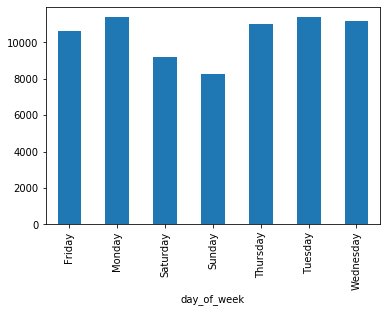

In [31]:
train.groupby('day_of_week')['amount'].mean().plot.bar()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

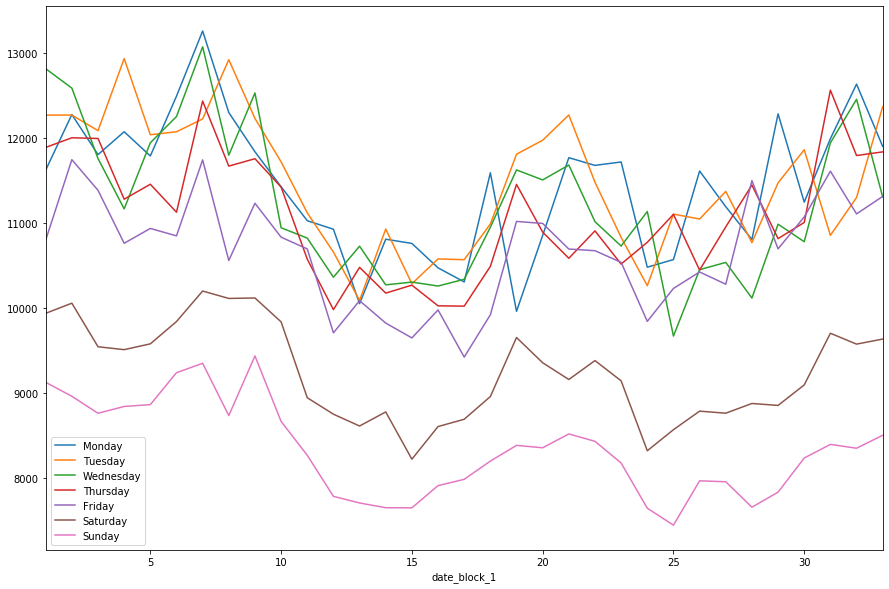

In [40]:
plt.figure(figsize = (15,10))
train[train.day_of_week == 'Monday'].groupby('date_block_1')['amount'].mean().plot(label = 'Monday')
train[train.day_of_week == 'Tuesday'].groupby('date_block_1')['amount'].mean().plot(label = 'Tuesday')
train[train.day_of_week == 'Wednesday'].groupby('date_block_1')['amount'].mean().plot(label = 'Wednesday')
train[train.day_of_week == 'Thursday'].groupby('date_block_1')['amount'].mean().plot(label = 'Thursday')
train[train.day_of_week == 'Friday'].groupby('date_block_1')['amount'].mean().plot(label = 'Friday')
train[train.day_of_week == 'Saturday'].groupby('date_block_1')['amount'].mean().plot(label = 'Saturday')
train[train.day_of_week == 'Sunday'].groupby('date_block_1')['amount'].mean().plot(label = 'Sunday')

plt.legend()

In [12]:
train['Sunday_count'] = train.day_of_week.mask(train.day_of_week.ne('Sunday'))
train['Saturday_count'] = train.day_of_week.mask(train.day_of_week.ne('Saturday'))

In [74]:
aa = train.groupby(['date_block_1','Sunday_count'])['day'].nunique().to_frame().reset_index()
aa = aa[['date_block_1', 'day']].rename(columns = {'day' : 'Sunday_count'})
dt = pd.merge(dt, aa)

aa = train.groupby(['date_block_1','Saturday_count'])['day'].nunique().to_frame().reset_index()
aa = aa[['date_block_1', 'day']].rename(columns = {'day' : 'Saturday_count'})
dt = pd.merge(dt, aa)

KeyError: 'Sunday_count'

## holiday

In [26]:
holiday_list = [
    pd.datetime(2016,6,6),
    pd.datetime(2016,8,15),
    pd.datetime(2016,9,14),
    pd.datetime(2016,9,15),
    pd.datetime(2016,9,16),
    pd.datetime(2016,10,3),
          
    pd.datetime(2017,1,27),
    pd.datetime(2017,1,30),
    pd.datetime(2017,3,1),
    pd.datetime(2017,5,3),
    pd.datetime(2017,5,5),
    pd.datetime(2017,5,9),
    pd.datetime(2017,6,6),
    pd.datetime(2017,8,15),
    pd.datetime(2017,10,2),
    pd.datetime(2017,10,3),
    pd.datetime(2017,10,4),
    pd.datetime(2017,10,5),
    pd.datetime(2017,10,6),
    pd.datetime(2017,10,9),
    pd.datetime(2017,12,25),
    
    pd.datetime(2018,1,1),
    pd.datetime(2018,2,15),
    pd.datetime(2018,2,16),
    pd.datetime(2018,2,17),
    pd.datetime(2018,3,1),
    pd.datetime(2018,5,5),
    pd.datetime(2018,5,7),
    pd.datetime(2018,5,22),
    pd.datetime(2018,6,6),
    pd.datetime(2018,6,13),
    pd.datetime(2018,8,15),
    pd.datetime(2018,9,24),
    pd.datetime(2018,9,25),
    pd.datetime(2018,9,26),
    pd.datetime(2018,10,3),
    pd.datetime(2018,10,9),
    pd.datetime(2018,12,25),
    
    pd.datetime(2019,1,1),
    pd.datetime(2019,2,4),
    pd.datetime(2019,2,5),
    pd.datetime(2019,2,6),
    pd.datetime(2019,3,1),
    pd.datetime(2019,5,6)
]

In [27]:
train['holiday'] = 0
train.loc[train.transacted_date.isin(holiday_list), 'holiday'] = 1

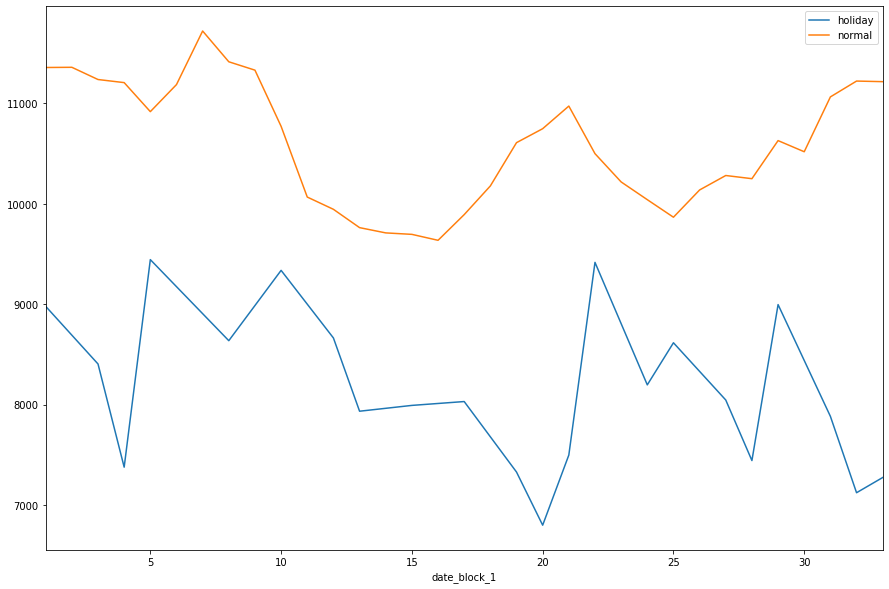

In [68]:
plt.figure(figsize = (15,10))
train[train.holiday == 1].groupby('date_block_1')['amount'].mean().plot(label = 'holiday')
train[train.holiday == 0].groupby('date_block_1')['amount'].mean().plot(label = 'normal')
plt.legend()

In [34]:
train.drop(['Sunday_count', 'Saturday_count'], axis =1, inplace = True)
train.head(3)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute,point_use,installment,business_type1,city1,city2,date_block_1,date_block_3,days,day_of_week,holiday
0,0,0,1,2016-06-01,13:13:00,0,NaN,기타 미용업,1857.142857,2016,6,1,13,13,0,0,미용업,NaN,NaN,1,1,30,Wednesday,0
1,0,1,7,2016-06-01,18:12:00,0,NaN,기타 미용업,857.142857,2016,6,1,18,12,0,0,미용업,NaN,NaN,1,1,30,Wednesday,0
2,0,2,2,2016-06-01,18:52:00,0,NaN,기타 미용업,2000.000000,2016,6,1,18,52,0,0,미용업,NaN,NaN,1,1,30,Wednesday,0


In [29]:
aa = train.groupby(['store_id', 'date_block_1'])['holiday'].sum().to_frame().reset_index()
dt = pd.merge(dt, aa)
dt['not_working'] = dt['Sunday_count'] + dt['Saturday_count'] + dt['holiday']

In [32]:
dt.isnull().sum()

store_id          0
date_block_1      0
amount            0
month_days        0
holiday           0
Sunday_count      0
Saturday_count    0
not_working       0
dtype: int64

In [81]:
dt.head()

,store_id,date_block_1,amount,cc_mode_store,cc_nunique_store,cc_mode_store_date,cc_nunique_store_date,month_days
0,0,1,7.470000e+05,0.0,7,0.0,7.0,30.0
1,0,2,1.005000e+06,0.0,7,0.0,7.0,31.0
2,0,3,8.715714e+05,0.0,7,0.0,7.0,31.0
3,0,4,8.978571e+05,0.0,7,0.0,7.0,30.0
4,0,5,8.354286e+05,0.0,7,0.0,7.0,31.0


# region

In [83]:
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute,point_use,installment,business_type1,city1,city2,date_block_1,date_block_3,days
0,0,0,1,2016-06-01,13:13:00,0,NaN,기타 미용업,1857.142857,2016,6,1,13,13,0,0,미용업,NaN,NaN,1,1,30
1,0,1,7,2016-06-01,18:12:00,0,NaN,기타 미용업,857.142857,2016,6,1,18,12,0,0,미용업,NaN,NaN,1,1,30
2,0,2,2,2016-06-01,18:52:00,0,NaN,기타 미용업,2000.000000,2016,6,1,18,52,0,0,미용업,NaN,NaN,1,1,30
3,0,3,0,2016-06-01,20:22:00,0,NaN,기타 미용업,7857.142857,2016,6,1,20,22,0,0,미용업,NaN,NaN,1,1,30
4,0,4,2,2016-06-02,11:06:00,0,NaN,기타 미용업,2000.000000,2016,6,2,11,6,0,0,미용업,NaN,NaN,1,1,30


In [90]:
train['region_label'] = np.nan
train.loc[train.region.isnull(), 'region_label'] = -1

In [100]:
le = LabelEncoder()
train.loc[~train.region.isnull(), 'region_label'] = le.fit_transform(train.loc[~train.region.isnull(), 'region'])
len(train.region_label.unique())

181

In [75]:
aa = train.groupby('store_id')['region_label'].agg(pd.Series.mode).to_frame()
aa.columns = ['region_label']
aa.reset_index(inplace = True)
aa.region_label = aa.region_label.apply('int8')
dt = pd.merge(dt, aa, on = 'store_id', how = 'left')
dt.head(3)

,store_id,date_block_1,amount,cc_nunique_store,cc_mode_store,cc_nunique_store_date,cc_mode_store_date,month_days,region_label
0,0,1,7.470000e+05,7,0.0,7.0,0.0,30.0,-1
1,0,2,1.005000e+06,7,0.0,7.0,0.0,31.0,-1
2,0,3,8.715714e+05,7,0.0,7.0,0.0,31.0,-1


## city1

In [17]:
dt.head(3)

,store_id,date_block_1,amount,cc_mode_store,cc_nunique_store,cc_mode_store_date,cc_nunique_store_date,month_days,region_label
0,0,1,7.470000e+05,0.0,7,0.0,7.0,30.0,-1.0
1,0,2,1.005000e+06,0.0,7,0.0,7.0,31.0,-1.0
2,0,3,8.715714e+05,0.0,7,0.0,7.0,31.0,-1.0


In [19]:
train.head(3)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute,point_use,installment,business_type1,city1,city2,date_block_1,date_block_3,days,region_label
0,0,0,1,2016-06-01,13:13:00,0,NaN,기타 미용업,1857.142857,2016,6,1,13,13,0,0,미용업,NaN,NaN,1,1,30,-1.0
1,0,1,7,2016-06-01,18:12:00,0,NaN,기타 미용업,857.142857,2016,6,1,18,12,0,0,미용업,NaN,NaN,1,1,30,-1.0
2,0,2,2,2016-06-01,18:52:00,0,NaN,기타 미용업,2000.000000,2016,6,1,18,52,0,0,미용업,NaN,NaN,1,1,30,-1.0


In [22]:
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [25]:
train['Seoul'] = 0
train.loc[train.city1 == '서울', 'Seoul'] = 1

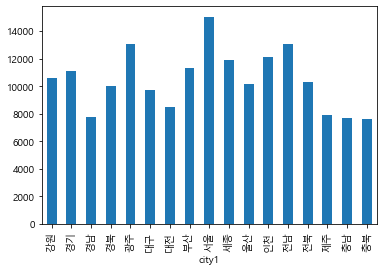

In [23]:
train.groupby('city1')['amount'].mean().plot.bar()

In [77]:
aa = train.groupby('store_id')['Seoul'].mean().to_frame().reset_index()
dt = pd.merge(dt, aa, how = 'left')

In [30]:
dt.to_pickle(path + 'dt.pkl')
train.to_pickle(path + 'train2.pkl')

# train test split

In [54]:
dt = pd.read_pickle(path + 'dt.pkl')
train = pd.read_pickle(path + 'train2.pkl')

In [4]:
dt.date_block_1.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36], dtype=int64)

In [80]:
X_train = dt[dt.date_block_1 <= 30].drop('amount', axis = 1)
y_train = dt.loc[dt.date_block_1 <= 30, 'amount']

X_valid = dt[(dt.date_block_1 > 30) & (dt.date_block_1 <= 33)].drop('amount', axis = 1)
y_valid = dt.loc[(dt.date_block_1 > 30) & (dt.date_block_1 <= 33), 'amount']

X_test = dt[dt.date_block_1 > 33].drop('amount', axis = 1)

print('train data shape : ', X_train.shape, y_train.shape)
print('valid data shape : ', X_valid.shape, y_valid.shape)
print('test data shape : ', X_test.shape)

train data shape :  (54446, 9) (54446,)
valid data shape :  (5786, 9) (5786,)
test data shape :  (5901, 9)


In [81]:
import gc
gc.collect()

4407

# modeling

## lightGBM

In [13]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(njobs = -1, n_estimators=500)

In [82]:
lgb.fit(X_train, y_train, eval_metric='mae', eval_set=[(X_train, y_train), (X_valid, y_valid)],
       verbose = 20, early_stopping_rounds=20)

Training until validation scores don't improve for 20 rounds.
[20]	training's l1: 750673	training's l2: 1.95056e+12	valid_1's l1: 752209	valid_1's l2: 2.01028e+12
[40]	training's l1: 700175	training's l2: 1.72672e+12	valid_1's l1: 708806	valid_1's l2: 1.86721e+12
[60]	training's l1: 669149	training's l2: 1.61462e+12	valid_1's l1: 681711	valid_1's l2: 1.79601e+12
[80]	training's l1: 641697	training's l2: 1.5287e+12	valid_1's l1: 660989	valid_1's l2: 1.74265e+12
[100]	training's l1: 621969	training's l2: 1.46264e+12	valid_1's l1: 646503	valid_1's l2: 1.70302e+12
[120]	training's l1: 606641	training's l2: 1.42233e+12	valid_1's l1: 635286	valid_1's l2: 1.67669e+12
[140]	training's l1: 592077	training's l2: 1.38267e+12	valid_1's l1: 623592	valid_1's l2: 1.64895e+12
[160]	training's l1: 580182	training's l2: 1.35203e+12	valid_1's l1: 614822	valid_1's l2: 1.62548e+12
[180]	training's l1: 568815	training's l2: 1.31991e+12	valid_1's l1: 605925	valid_1's l2: 1.60369e+12
[200]	training's l1: 5588

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=500, n_jobs=-1, njobs=-1, num_leaves=31,
       objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

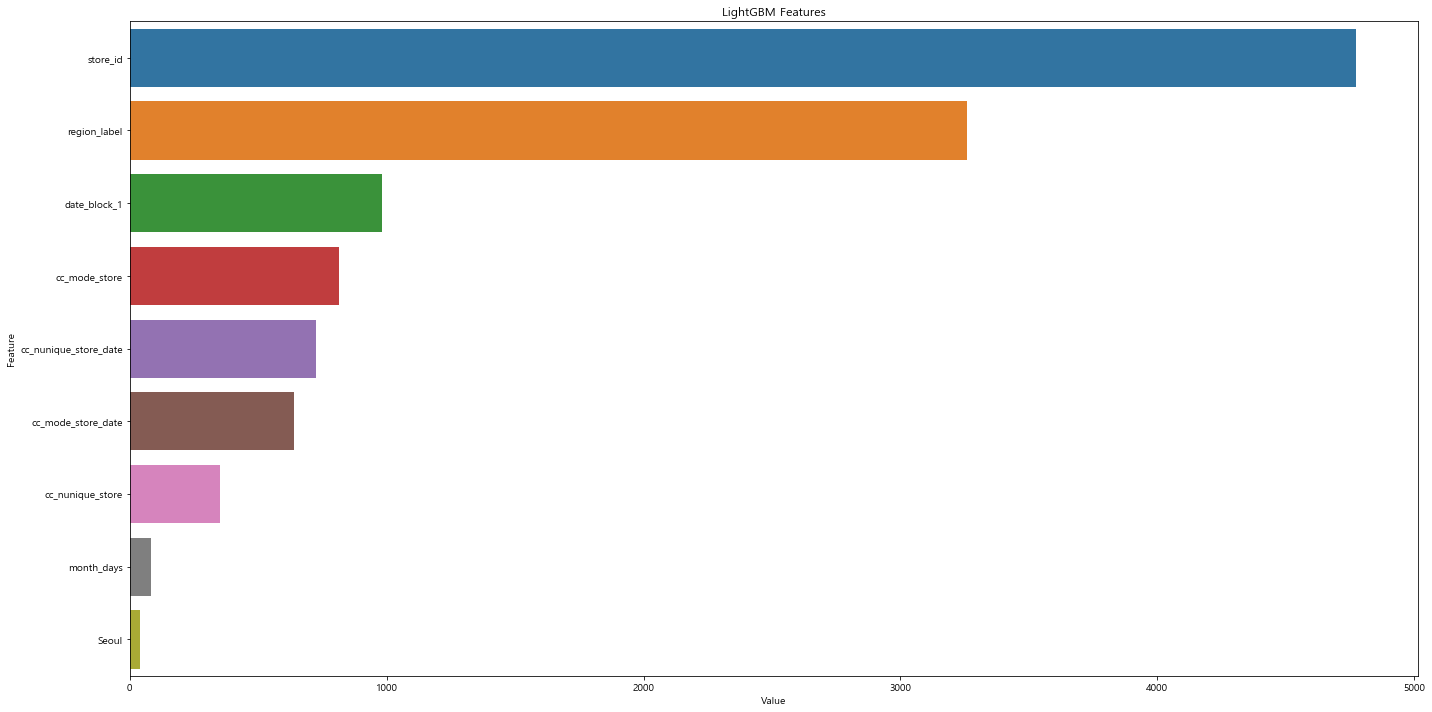

In [83]:
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

## XGBoost

In [35]:
from xgboost import XGBRegressor
xgb = XGBRegressor(njobs = -1, n_estimators=500)

In [84]:
xgb.fit(X_train, y_train, eval_metric='mae', eval_set=[(X_train, y_train), (X_valid, y_valid)],
       verbose = 20, early_stopping_rounds=20)

[0]	validation_0-mae:1.0296e+06	validation_1-mae:985820
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 20 rounds.


C:\Users\wjssm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20]	validation_0-mae:766048	validation_1-mae:753510
Stopping. Best iteration:
[9]	validation_0-mae:741227	validation_1-mae:722368



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       njobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# Submission

In [40]:
sub = pd.read_csv(path + 'submission.csv')
sub.head()

,store_id,amount
0,0,0
1,1,0
2,2,0
3,4,0
4,5,0


In [93]:
lgb_sub = X_test[['store_id', 'date_block_1']].reset_index(drop = True)
lgb_sub['amount'] = lgb.predict(X_test)
lgb_sub.head(3)

,store_id,date_block_1,amount
0,0,34,290671.972504
1,1,34,146261.983956
2,2,34,146261.983956


In [96]:
lgb_sub = lgb_sub.groupby('store_id')['amount'].sum().to_frame()
lgb_sub['amount'] = np.round(lgb_sub['amount'], 6)
print('sub shape', sub.shape)
print('lgb_sub shape', lgb_sub.shape)

sub shape (1967, 2)
lgb_sub shape (1967, 1)


In [97]:
lgb_sub.to_csv('../sub/20190807_lgb_simple.csv')